In [9]:
from pylab import *

In [10]:
def integra_h3(x,f):
    mod_f , int_f , h = len(f)%2 , 0 , x[1]-x[0]
    if mod_f == 0:
        for i in range(2,len(f),2):
            int_f += f[i+1] + 4*f[i] + f[i-1]
        int_f = int_f/3
        int_f += (23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] - 3*f[4])/48
    else:
        for i in range(1,len(f),2):
            int_f += f[i+1] + 4*f[i] + f[i-1]
        int_f = int_f/3
    return int_f*h

Int de y = 2.0021275988063008


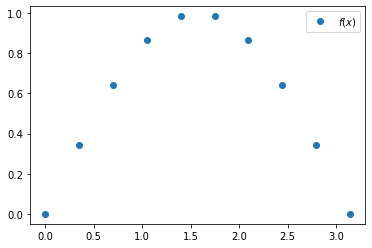

In [11]:
x = linspace(0,pi,10)
y = sin(x)
int_de_y = integra_h3(x,y)
print('Int de y =',int_de_y)
plot(x,y,'o',label='$f(x)$')
legend()
show()

In [12]:
def primitiva_v1(x,f):
    # Ojo esta funcion falta adaptarla a todos los puntos
    h = x[1]-x[0]
    F = zeros_like(f)
    for i in range(1,len(f)-4):
        F[i] = F[i-1] + (23*f[i] + 26*f[i+1] - 4*f[i+2] + 6*f[i+3] - 3*f[i+4])
    return F*h/48

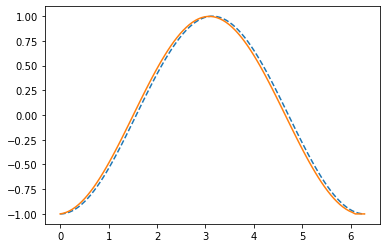

In [13]:
x = linspace(0,2*pi,100)
y = sin(x)
Y = -cos(x)
prim_y = primitiva_v1(x,y)
plot(x,Y,'--')
plot(x,prim_y-1)
show()

In [24]:
def primitiva_v2(x,f):
    # Ojo esta funcion falta adaptarla a todos los puntos
    N , h = len(f) , x[1]-x[0]
    if N%2 == 1:
        print('primer caso')
        N_cut = int( (N-1)/2 +1 )
        x_c , F = zeros(N_cut) , zeros(N_cut)
        for i in range(N_cut):
            x_c[i] = x[2*i]
        for i in range(N_cut-1):
            F[i+1] = F[i] + (f[i+2] + 4*f[i+1] + f[i])
        F = F/3
    else:
        print('segundo caso')
        N_cut = int(N/2)
        x_c , F = zeros(N_cut) , zeros(N_cut)
        x_c[0] = x[0]
        for i in range(N_cut-1):
            x_c[i+1] = x[2*i+1]
        F[1] = (23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] - 3*f[4])*0.0625
        for i in range(1,N_cut-2):
            F[i+1] = F[i] + (f[i+2] + 4*f[i+1] + f[i])
        F = F/3
    return x_c , F*h

primer caso


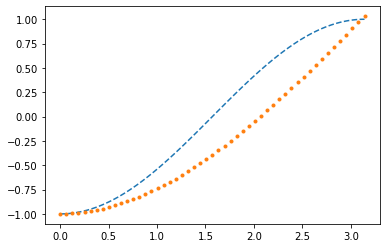

In [26]:
x = linspace(0,pi,101)
y = sin(x)
Y = -cos(x)
x_c , prim_y = primitiva_v2(x,y)
plot(x,Y,'--')
plot(x_c , prim_y-1,'.')

In [27]:
prim_y[-1]

2.030917330435696

In [106]:
3/48

0.0625